<a href="https://colab.research.google.com/github/GerardoxCarreon/FisicaComputacional1/blob/master/Actividad9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Actividad 9***
"Teoria de Estabilidad de las Solución de Ecuaciones Diferenciales Ordinarias con Python" 

---

En esta la actividad 9 de Fisica Computacional, exploraremos la teoría de estabilidad, esta se refiere a la estabilidad de las soluciones de ecuaciones diferenciales ó trayectorias de un sistema dinámico bajo pequeñas perturbaciones de las condiciones iniciales.

Estudiaremos problemas de valor inicial en el caso de los sistemas autónomos, que esto sucede cuando la funcion "f" no depende del tiempo: f(x(t))

También haremos uso de funciones que ofrece SciPy para integrar ecuaciones diferenciales ordinarias scipy.integrate. Veremos primero la función scipy.integrate.odeint y después la función scipy.integrate.solve_ivp.

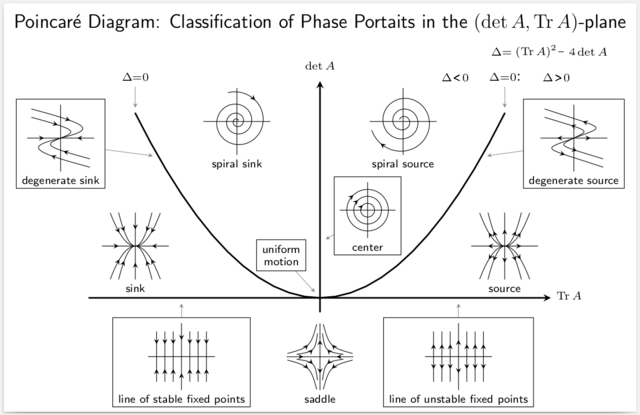

In [ ]:
#Aqui introducimos las bibliotecas a utilizar
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d
from scipy import integrate, linalg
import pylab as plt


%matplotlib inline

*   # ***Ejercicio 1.*** 
Determinar los punto críticos del sistema de ecuaciones diferenciales:

\
$$\begin{eqnarray*}
\frac{d x}{d t} & = & y  \\
\frac{d y}{dt } & = & -x   \\
\end{eqnarray*}$$

In [ ]:
#Primero definimos el sistema de ecuaciones diferenciales de manera matricial
A=np.array([[0,1],
              [-1,0]])
#Calculamos sus eigenvalores
eigenval, eigenvec = la.eig(A)
print('eigenvalores:\n',eigenval)
print('')
#Calculamos la traza de la matriz
tr=np.trace(A)
print('Traza de A:\n',tr) 

eigenvalores:
 [0.+1.j 0.-1.j]

Traza de A:
 0


In [ ]:
#Podemos observar gracias a los eigenvalores (de forma:λ=a±bi) y a la traza de la matriz que el punto critico del sistema es de tipo centro
#Ahora procedemos a conseguir el punto crítico resolviendo el sistema homogéneo:
#Resolvemos el sistema homogéneo Ax=0 para determinar puntos críticos
b=np.zeros((2,1))
pcr=la.solve(A,b)
print('Puntos criticos:')
print('x = ',pcr[0],'\n','y = ',pcr[1])

Puntos criticos:
x =  [-0.] 
 y =  [0.]


In [ ]:
#Tenemos que de manera general la solucion por la transformada de Laplace es:

$$ \begin{pmatrix} x \\ y \end{pmatrix}= \begin{pmatrix} c_1\cos{t}+c_2\sin{t} \\ -c_1\sin{t}+c_2\cos{t} \end{pmatrix} $$

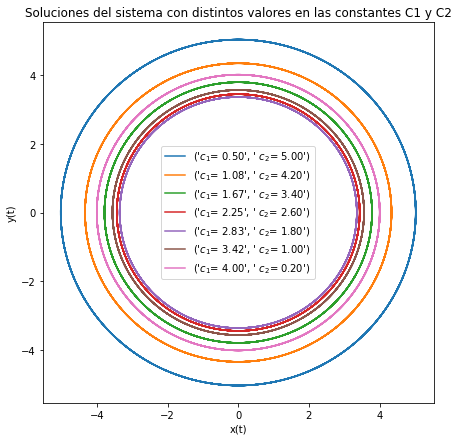

In [ ]:
#Graficamos distintas soluciones para valores de las constantes C1 y C2 
#Definimos la función vectorial de solución del sistema.
def x(t,c1,c2):
  t0=np.zeros((1000,))
  t0=t
  r=[c1*np.cos(t0)+c2*np.sin(t0),-c1*np.sin(t0)+c2*np.cos(t0)]
  return r

#Definimos las condiciones
#Definimos puntos de tiempo t y las constantes C1 y C2
t=np.linspace(0,50,1000)
c1=list(np.linspace(0.5,4,7))
c2=list(np.linspace(5,0.2,7))

#Graficamos las soluciones 
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=x(t,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Soluciones del sistema con distintos valores en las constantes C1 y C2')
plt.legend()
plt.show()

*   # ***Ejercicio 2.*** 
Determinar los punto críticos del sistema de ecuaciones diferenciales:

\
$$\begin{eqnarray*}
\frac{d x}{d t}=y  \\
\frac{d y}{dt }=x  \\
\end{eqnarray*}$$

In [ ]:
#Primero definimos el sistema de ecuaciones diferenciales de manera matricial
A1=np.array([[0,1],
              [1,0]])
#Calculamos sus eigenvalores
eigenval, eigenvec = la.eig(A1)
print('eigenvalores:\n',eigenval)
print('')
#Calculamos la traza de la matriz
tr=np.trace(A1)
print('Traza de A1:\n',tr) 

eigenvalores:
 [ 1.+0.j -1.+0.j]

Traza de A1:
 0


In [ ]:
#Podemos observar gracias a los eigenvalores (reales y distintos entre si) y a la traza de la matriz que el punto critico del sistema es de tipo silla (λ2<0<λ1)
#Ahora procedemos a conseguir el punto crítico resolviendo el sistema homogéneo:
#Resolvemos el sistema homogéneo Ax=0 para determinar puntos críticos
b=np.zeros((2,1))
pcr=la.solve(A1,b)
print('Puntos criticos:')
print('x = ',pcr[0],'\n','y = ',pcr[1])

Puntos criticos:
x =  [0.] 
 y =  [0.]


In [ ]:
#Tenemos que de manera general la solucion del sistema es:

$$ \begin{pmatrix} x \\ y \end{pmatrix}= \begin{pmatrix} c_1e^t-c_2e^{-t} \\ c_1e^{t}+c_2e^{-t} \end{pmatrix} $$

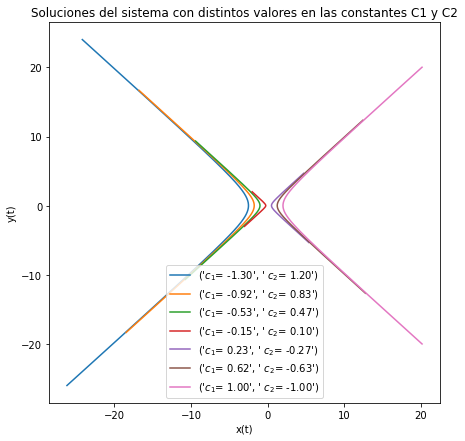

In [ ]:
#Graficamos distintas soluciones para valores de las constantes C1 y C2 
#Definimos la función vectorial de solución del sistema.
def x1(t,c1,c2):
  r=[c1*np.exp(t)-c2*np.exp(-t), c1*np.exp(t)+c2*np.exp(-t)]
  return r

#Definimos las condiciones
#Definimos puntos de tiempo t y las constantes C1 y C2
t=np.linspace(-3,3,500)
c1=list(np.linspace(-1.3,1,7))
c2=list(np.linspace(1.2,-1,7))

#Graficamos las soluciones
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=x1(t,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Soluciones del sistema con distintos valores en las constantes C1 y C2')
plt.legend()
plt.show()

*   # ***Ejercicio 3.*** 
Determinar los punto críticos del sistema de ecuaciones diferenciales:

\
$$\begin{eqnarray*}
\frac{d^2 x}{d t^2} + \omega_0^2 x  =  0, \ \omega_0 &gt; 0  \\
\end{eqnarray*}$$

\
Descomponemos en un sistema de ecuaciones aplicando un cambio de variable

\
$$ \begin{align*} \frac{dx}{dt}&=y\\ \frac{dy}{dt}&=-\omega_0^2x \end{align*} $$

In [ ]:
#Mediante un cambio de variable (y=dx/dt) descomponemos el sistema de ecuaciones y obtenemos la siguiente matriz
#Primero definimos el sistema de ecuaciones diferenciales de manera matricial
w0=1
A2=np.array([[0,1],
              [w0,0]])
#Calculamos sus eigenvalores
eigenval, eigenvec = la.eig(A2)
print('eigenvalores:\n',eigenval)
print('')
#Calculamos la traza de la matriz
tr=np.trace(A2)
print('Traza de A2:\n',tr) 

eigenvalores:
 [ 1.+0.j -1.+0.j]

Traza de A2:
 0


In [ ]:
#Podemos observar gracias a los eigenvalores (de forma λ=a±bi) y a la traza de la matriz que el punto critico del sistema es de tipo centro
#Ahora procedemos a conseguir el punto crítico resolviendo el sistema homogéneo:
#Resolvemos el sistema homogéneo Ax=0 para determinar puntos críticos
b=np.zeros((2,1))
pcr=la.solve(A2,b)
print('Puntos criticos:')
print('x = ',pcr[0],'\n','y = ',pcr[1])

Puntos criticos:
x =  [0.] 
 y =  [0.]


In [ ]:
#Tenemos que de manera general la solucion del sistema es:

$$ \begin{pmatrix} x \\ y \end{pmatrix}= \begin{pmatrix} c_1\cos{(\omega_0t)}+c_2\sin{(\omega_0t)} \\ -c_1\sin{(\omega_0t)}+c_2\cos{(\omega_0t)} \end{pmatrix} $$

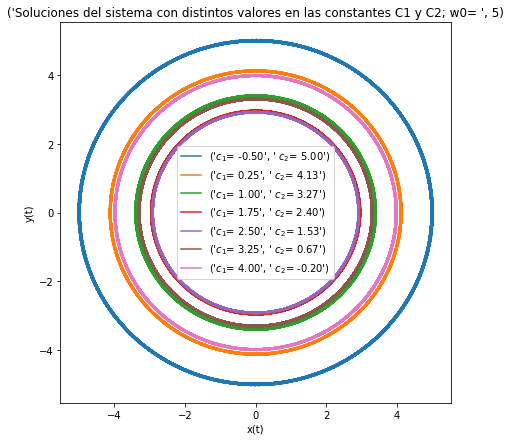

In [ ]:
#Graficamos distintas soluciones para valores de las constantes C1 y C2 
#Definimos la función vectorial de solución del sistema.
def x(t,w0,c1,c2):
  r=[c1*np.cos(w0*t)+c2*np.sin(w0*t),-c1*np.sin(w0*t)+c2*np.cos(w0*t)]
  return r

#Definimos las condiciones
#Definimos puntos de tiempo t y las constantes C1 y C2
w0=5
t=np.linspace(-10,50,1000)
c1=list(np.linspace(-0.5,4,7))
c2=list(np.linspace(5,-0.2,7))

#Graficamos las soluciones
plt.figure(figsize=(7,7))
for c,d in zip(c1,c2):
  v=x(t,w0,c,d)
  s=np.array(v)
  plt.plot(s[0,:],s[1,:],label=('$c_1$= {:.2f}'.format(c),' $c_2$= {:.2f}'.format(d)))
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title(('Soluciones del sistema con distintos valores en las constantes C1 y C2; w0= ',w0))
plt.legend()
plt.show()

*   # ***Ejercicio 4.*** 
Determinar los punto críticos del sistema de ecuaciones diferenciales:

\
$$\begin{eqnarray*}
\frac{d x}{d t} & = & -2 x  \\
\frac{d y}{dt } & = &  2 z  \\
\frac{d z}{dt } & = &  - 2 y  \\
\end{eqnarray*}$$

In [ ]:
#Si observamos bien el sistema de ecuaciones podemos notar que la variable "x" es independiente de las otras dos por lo que podemos obtener el punto critico con el subsistema de las variables "yz"
#Primero definimos el sistema de ecuaciones diferenciales de manera matricial
M=np.array([[-2,0,0],[0,0,2],[0,-2,0]])
A3=np.array([[0,-2],
              [2,0]])
#Calculamos sus eigenvalores
eigenval, eigenvec = la.eig(A3)
print('eigenvalores:\n',eigenval)
print('')
#Calculamos la traza de la matriz
tr=np.trace(A3)
print('Traza de A3:\n',tr) 

eigenvalores:
 [0.+2.j 0.-2.j]

Traza de A3:
 0


In [ ]:
#Podemos observar gracias a los eigenvalores (de forma λ=a±bi) y a la traza de la matriz que el punto critico del sistema es de tipo centro
#Ahora procedemos a conseguir el punto crítico resolviendo el sistema homogéneo:
#Resolvemos el sistema homogéneo Ax=0 para determinar puntos críticos
b=np.zeros((3,1))
pcr=la.solve(M,b)
print('Puntos criticos:')
print('x = ',pcr[0],'\n','y = ',pcr[1],'\n','z =',pcr[2])

Puntos criticos:
x =  [-0.] 
 y =  [-0.] 
 z = [0.]


In [ ]:
#Tenemos que de manera general la solucion del sistema es:

$$ \vec{x}=\begin{pmatrix} c_1e^{-2t} \\ c_2\cos{2t}+c_3\sin{2t} \\ -c_2\sin{2t}+c_3\cos{2t} \end{pmatrix} $$

<Figure size 432x288 with 0 Axes>

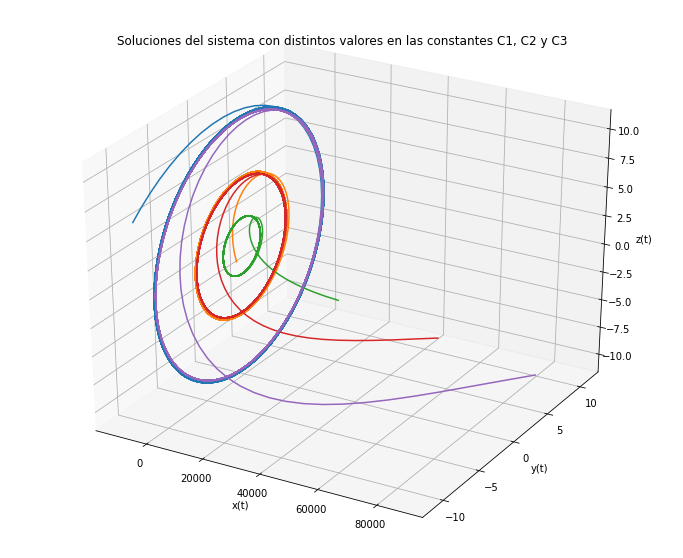

In [ ]:
#Graficamos distintas soluciones para valores de las constantes C1, C2 y C3
#Definimos la función vectorial de solución del sistema.
def x(t,c1,c2,c3):
  r=[c1*np.exp(-2*t), c2*np.cos(2*t)+c3*np.sin(2*t), -c2*np.sin(2*t)+c3*np.cos(2*t)]
  return r

#Definimos las condiciones
#Definimos puntos de tiempo t y las constantes C1, C2 y C3
t=np.linspace(-5,50,1000)
c1=list(np.linspace(-0.5,4,5))
c2=list(np.linspace(5,-0.2,5))
c3=list(np.linspace(-10,11,5))

# Graficamos las soluciones
plt.figure()
plt.figure(figsize = ( 12, 10 ))
ax=plt.axes(projection='3d')
for c,d,e in zip(c1,c2,c3):
  v=x(t,c,d,e)
  s=np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.title('Soluciones del sistema con distintos valores en las constantes C1, C2 y C3')

plt.show()

*   # ***Ejercicio 5.*** 
Determinar los punto críticos del sistema de ecuaciones diferenciales:

\
$$\begin{eqnarray*}
\frac{d x}{d t} & = & - x + z  \\
\frac{d y}{dt } & = &  3 y  \\
\frac{d z}{dt } & = &  - x - z \\
\end{eqnarray*}$$

In [ ]:
#Si observamos bien el sistema de ecuaciones podemos notar que la variable "y" es independiente de las otras dos por lo que podemos obtener el punto critico con el subsistema de las variables "xz"
#Primero definimos el sistema de ecuaciones diferenciales de manera matricial
M=np.array([[-1,0,1],[0,3,0],[-1,0,-1]])
A4=np.array([[-1,1],
              [-1,-1]])
#Calculamos sus eigenvalores
eigenval, eigenvec = la.eig(A4)
print('eigenvalores:\n',eigenval)
print('')
#Calculamos la traza de la matriz
tr=np.trace(A4)
print('Traza de A4:\n',tr) 

eigenvalores:
 [-1.+1.j -1.-1.j]

Traza de A4:
 -2


In [ ]:
#Podemos observar gracias a los eigenvalores (de forma λ=a±bi) y a la traza de la matriz (-2<0 y a=-1<0<1=b) que el punto critico del sistema es de tipo foco espiral estable
#Ahora procedemos a conseguir el punto crítico resolviendo el sistema homogéneo:
#Resolvemos el sistema homogéneo Ax=0 para determinar puntos críticos
b=np.zeros((3,1))
pcr=la.solve(M,b)
print('Puntos criticos:')
print('x = ',pcr[0],'\n','y = ',pcr[1],'\n','z =',pcr[2])

Puntos criticos:
x =  [-0.] 
 y =  [0.] 
 z = [-0.]


In [ ]:
#Tenemos que de manera general la solucion del sistema es:

$$ \begin{pmatrix} x\\ y\\ z \end{pmatrix}=\begin{pmatrix} e^{-t} (c_1\sin{t}+c_3\cos{t})\\ c_2e^{3t} \\ e^{-t}(c_3\sin{t}-c_1\cos{t}) \end{pmatrix} $$

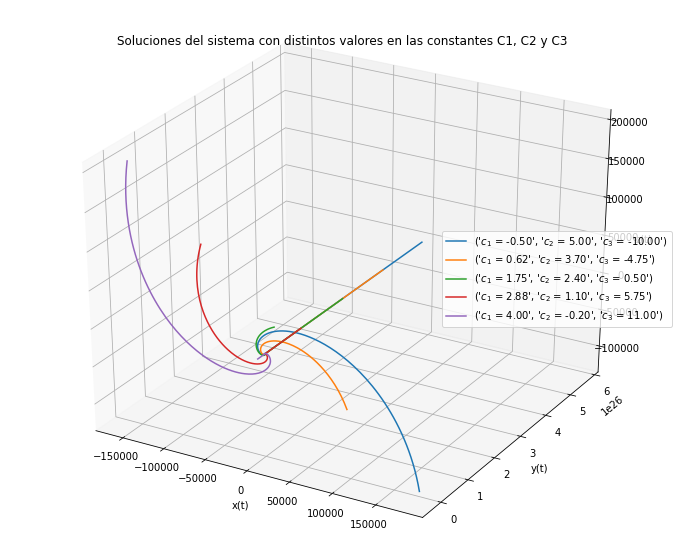

In [ ]:
#Graficamos distintas soluciones para valores de las constantes C1, C2 y C3 
#Definimos la función vectorial de solución del sistema.
def x(t,c1,c2,c3):
  r=[np.exp(-t)*(c1*np.sin(t)+c3*np.cos(t)),c2*np.exp(3*t) ,np.exp(-t)*(c3*np.sin(t)-c1*np.cos(t)) ]
  return r

#Definimos las condiciones
#Definimos puntos de tiempo t y las constantes C1, C2 y C3
t=np.linspace(-10,20,1000)
c1=list(np.linspace(-0.5,4,5))
c2=list(np.linspace(5,-0.2,5))
c3=list(np.linspace(-10,11,5))

#Graficamos las soluciones
fig=plt.figure(figsize=(12,10))
ax=plt.axes(projection='3d')
for c,d,e in zip(c1,c2,c3):
  v=x(t,c,d,e)
  s=np.array(v)
  ax.plot3D(s[0,:],s[1,:],s[2,:],label=('$c_1$ = {:.2f}'.format(c),'$c_2$ = {:.2f}'.format(d),'$c_3$ = {:.2f}'.format(e)))
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
plt.title('Soluciones del sistema con distintos valores en las constantes C1, C2 y C3')
ax.legend(loc='center right')
plt.show()

*   # ***Ejercicio 6.*** 
Resuelva los siguientes problemas de valor inicial.
Determinar los punto críticos del sistema de ecuaciones diferenciales:

\
$$\begin{eqnarray*}
\frac{d x}{d t} & = & - x  \\
\frac{d y}{dt } & = &  x + 2 y  \\
x(0) = 0, & & y(0) = 3
\end{eqnarray*}$$

In [ ]:
#Primero definimos el sistema de ecuaciones diferenciales de manera matricial
A5=np.array([[-1,0],
              [1,2]])
#Calculamos sus eigenvalores
eigenval, eigenvec = la.eig(A5)
print('eigenvalores:\n',eigenval)
print('')
#Calculamos la traza de la matriz
tr=np.trace(A5)
print('Traza de A5:\n',tr) 

eigenvalores:
 [ 2.+0.j -1.+0.j]

Traza de A5:
 1


In [ ]:
#Podemos observar gracias a los eigenvalores y a la traza de la matriz que el punto critico del sistema es de tipo silla (λ2<0<λ1)
#Tenemos que de manera general la solucion del sistema es:

$$\begin{equation*}
x(t) = c_1 \exp(2t) \ {v_1} + c_2 \exp( -t) \ {v_2}
\end{equation*}$$

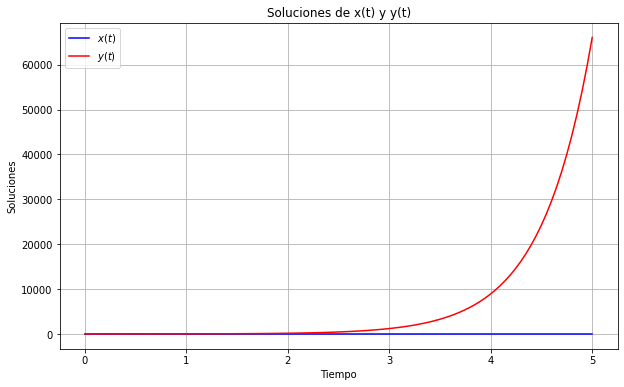

In [ ]:
#Definimos la función dx/dt para la solución del sistema
def f6(y, t):
  x, v = y
  return [-x, x+2*v]

#Definimos las condiciones
#Definimos puntos de tiempo t 
t=np.linspace(0,5,100)
y0=[0,3]

#Graficamos las soluciones en función del tiempo 
plt.figure(figsize=(10,6))
plt.grid();
y=odeint(f6,y0,t)
plt.plot(t,y[0:,0],'b',label='$x(t)$')
plt.plot(t,y[0:,1],'r',label='$y(t)$')
plt.title('Soluciones de x(t) y y(t)')
plt.xlabel('Tiempo')
plt.ylabel('Soluciones')
plt.legend()
plt.show()

*   # ***Ejercicio 7.*** 
Resuelva los siguientes problemas de valor inicial. Determinar los punto críticos del sistema de ecuaciones diferenciales:

\
$$\begin{eqnarray*}
\frac{d x}{d t} & = & 2 x + y  \\
\frac{d y}{dt } & = &  x +  y  \\
x(1) = 1, & & y(1) = 1
\end{eqnarray*}$$

In [ ]:
#Primero definimos el sistema de ecuaciones diferenciales de manera matricial
A6=np.array([[2,1],
              [1,1]])
#Calculamos sus eigenvalores
eigenval, eigenvec = la.eig(A6)
print('eigenvalores:\n',eigenval)
print('')
#Calculamos la traza de la matriz
tr=np.trace(A6)
print('Traza de A6:\n',tr) 

eigenvalores:
 [2.61803399+0.j 0.38196601+0.j]

Traza de A6:
 3


In [ ]:
#Podemos observar gracias a los eigenvalores y a la traza de la matriz que el punto critico del sistema es de tipo foco espiral inestable
#Tenemos que de manera general la solucion del sistema es:

$$\begin{equation*}
x(t) = c_1 \exp(2.61...t) \ {v_1} + c_2 \exp( 0.38...t) \ {v_2}
\end{equation*}$$

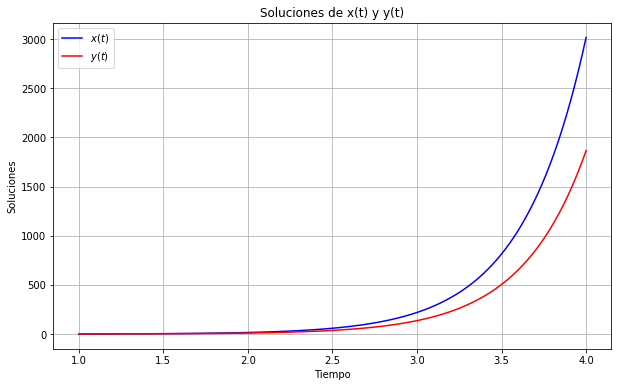

In [ ]:
#Definimos la función dx/dt para la solución del sistema
def f7(y, t):
  x, v = y
  return [2*x+v, x+v]

#Definimos las condiciones
#Definimos puntos de tiempo t 
t=np.linspace(1,4,1000)
y0=[1,1]

# Graficamos las soluciones en función del tiempo 
plt.figure(figsize=(10,6))
plt.grid();
y=odeint(f7,y0,t)
plt.plot(t,y[0:,0],'b',label='$x(t)$')
plt.plot(t,y[0:,1],'r',label='$y(t)$')
plt.title('Soluciones de x(t) y y(t)')
plt.xlabel('Tiempo')
plt.ylabel('Soluciones')
plt.legend()
plt.show()

*   # ***Ejercicio 8.*** 
Resuelva los siguientes problemas de valor inicial. Determinar los punto críticos del sistema de ecuaciones diferenciales:

\
$$\begin{eqnarray*}
\frac{d x}{d t}  = & A x  \\
x(0)  = & (0,3) \\
A  = & \begin{bmatrix}
0 & 3 \\
1 & -2 \\
\end{bmatrix}
\end{eqnarray*}$$

In [ ]:
#Primero definimos el sistema de ecuaciones diferenciales de manera matricial
A7=np.array([[0,3],
              [1,-2]])
#Calculamos sus eigenvalores
eigenval, eigenvec = la.eig(A7)
print('eigenvalores:\n',eigenval)
print('')
#Calculamos la traza de la matriz
tr=np.trace(A7)
print('Traza de A7:\n',tr) 

eigenvalores:
 [ 1.+0.j -3.+0.j]

Traza de A7:
 -2


In [ ]:
#Podemos observar gracias a los eigenvalores y a la traza de la matriz que el punto critico del sistema es de tipo silla (λ2<0<λ1)
#Tenemos que de manera general la solucion del sistema es:

$$\begin{equation*}
x(t) = c_1 \exp(t) \ {v_1} + c_2 \exp( -t) \ {v_2}
\end{equation*}$$

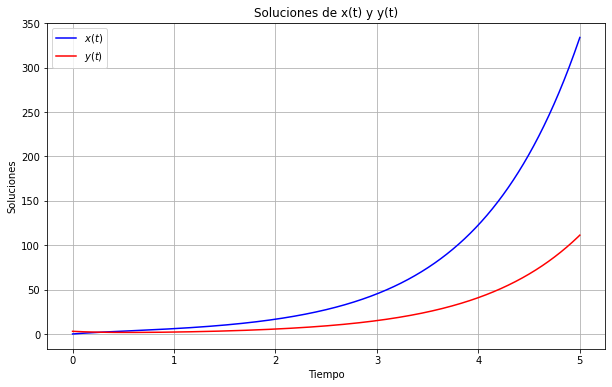

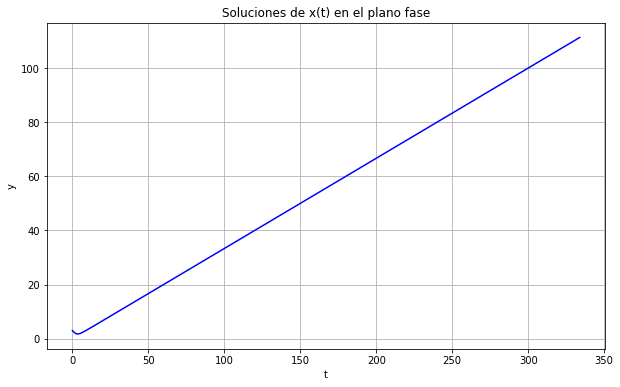

In [ ]:
#Definimos la función dx/dt para la solución del sistema
def f8(y, t):
  x1, x2 = y
  return [ 3*x2 , x1-2*x2 ]

#Definimos las condiciones
#Definimos puntos de tiempo t 
t=np.linspace(0,5,1000)
y0=[0,3]

#Graficamos las soluciones en función del tiempo 
plt.figure(figsize=(10,6))
plt.grid();
y=odeint(f8,y0,t)
plt.plot(t,y[0:,0],'b',label='$x(t)$')
plt.plot(t,y[0:,1],'r',label='$y(t)$')
plt.title('Soluciones de x(t) y y(t)')
plt.xlabel('Tiempo')
plt.ylabel('Soluciones')
plt.legend()
plt.show()

#Solucion en el plano fase
plt.figure(figsize=(10,6))
plt.grid();
y=odeint(f8,y0,t)
plt.plot(y[0:,0],y[0:,1],'b',label='$x_2(t)$ vs $x_1(t)$')
plt.title('Soluciones de x(t) en el plano fase')
plt.xlabel('t')
plt.ylabel('y')
plt.show()

*   # ***Ejercicio 9.*** 
Resuelva los siguientes problemas de valor inicial. Determinar los punto críticos del sistema de ecuaciones diferenciales:


\
$$\begin{eqnarray*}
\frac{d x}{d t}  = & A x  \\
x(0)  = & (0,-b,b) \\
A  = & \begin{bmatrix}
2 & 0 & 0 \\
0 & -1 & 0 \\
0 & 2 & -3 \\
\end{bmatrix}
\end{eqnarray*}$$

In [ ]:
#Si observamos bien el sistema de ecuaciones podemos notar que la variable "x" es independiente de las otras dos por lo que podemos obtener el punto critico con el subsistema de las variables "yz"
#Primero definimos el sistema de ecuaciones diferenciales de manera matricial
A8=np.array([[  2 ,  0  ,  0 ],
              [  0 , -1  ,  0 ],
              [  0 ,  2  , -3 ]])
#Calculamos sus eigenvalores
eigenval, eigenvec = la.eig(A8)
print('eigenvalores:\n',eigenval)
print('')
#Calculamos la traza de la matriz
tr=np.trace(A8)
print('Traza de A8:\n',tr) 

eigenvalores:
 [ 2.+0.j -3.+0.j -1.+0.j]

Traza de A8:
 -2


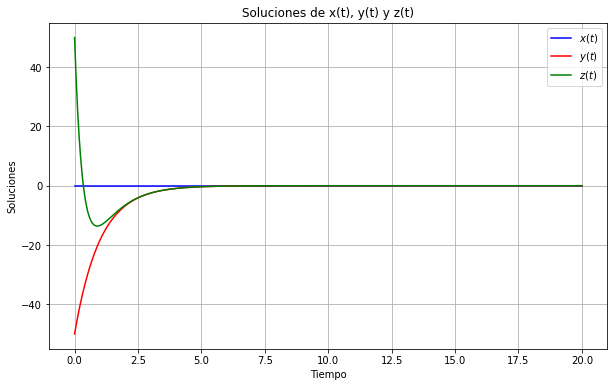

<Figure size 432x288 with 0 Axes>

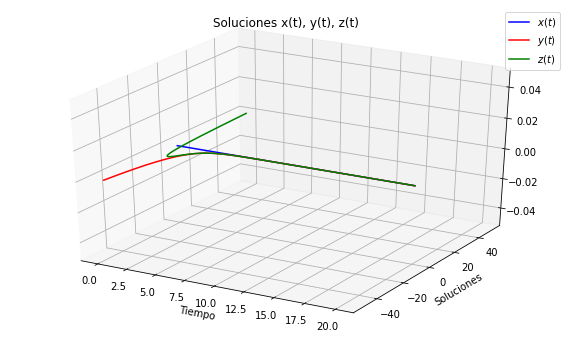

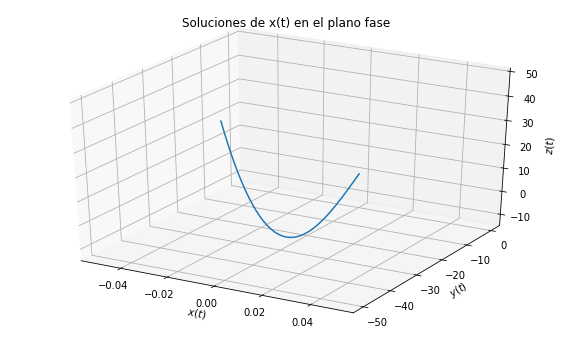

In [ ]:
#Definimos la función dx/dt para la solución del sistema
def f9(y, t):
  x1, x2, x3 = y
  return [ 2*x1 , -x2 , 2*x2-3*x3 ]

#Definimos las condiciones
#Definimos puntos de tiempo t 
t=np.linspace(0,20,1000)
b=50
y0=[0,-b,b]

#Graficamos las soluciones en función del tiempo 
plt.figure(figsize=(10,6))
plt.grid();
y=odeint(f9,y0,t)
plt.plot(t,y[0:,0],'b',label='$x(t)$')
plt.plot(t,y[0:,1],'r',label='$y(t)$')
plt.plot(t,y[0:,2],'g',label='$z(t)$')
plt.title('Soluciones de x(t), y(t) y z(t)')
plt.xlabel('Tiempo')
plt.ylabel('Soluciones')
plt.legend()
plt.show()
#Graficamos las soluciones en función del tiempo en R^3
f1 = plt.figure();
plt.figure(figsize=(10, 6)); 
ax = plt.axes( projection= "3d" )
ax.plot3D(t,y[0:,0],'b',label='$x(t)$');
ax.plot3D(t,y[0:,1],'r',label='$y(t)$')
ax.plot3D(t,y[0:,2],'g',label='$z(t)$')
plt.grid();
plt.legend(loc='best');
plt.xlabel('Tiempo');
plt.ylabel('Soluciones');
plt.title('Soluciones x(t), y(t), z(t)');
plt.show();

#Solucion en el plano fase en R^3
y=odeint(f9,y0,t)
plt.figure(figsize=(10,6))
ax=plt.axes(projection='3d')
ax.plot3D(y[0:,0],y[0:,1],y[0:,2])
ax.set_title('Soluciones de x(t) en el plano fase')
ax.set_xlabel('$x(t)$')
ax.set_ylabel('$y(t)$')
ax.set_zlabel('$z(t)$')
plt.show()

*   # ***Ejercicio 10.*** 
Se tiene el siguiente sistema de resortes acoplados con dos masas.

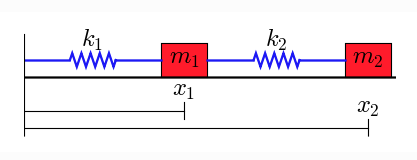




El sistema esta sujeto del primer resorte de la izquierda. Cuando el sistema se deja en reposo, las longitudes de los resortes son $L_1$ y $L_2$.

Las ecuaciones de movimiento estan dadas por las siguientes ecuaciones diferenciales acopladas:

\
$$\begin{eqnarray*}
m_1 x_1^{''} + b_1 x_1^{'}+k_1 (x_1-L_1)-k_2(x_2-x_1-L_2) & = & 0 \\
m_2 x_2^{''} + b_2 x_2^{'}+k_2(x_2-x_1-L_2) & = & 0 \\
\end{eqnarray*}$$

\
Encuentre las soluciones como funciones de $t$ y grafíquelas, así como las trayectorias en el espacio fase.

Suponga que $L_1=L_2=1$ y que las masas son iguales $m_1=m_2=1$.

**10.1)** Encuentre los eigenvalores del sistema y diga como son las soluciones.

**10.2)** Caso sin fricción. $b_1=b_2=0$, $k_1=6$, $k_2=4$, condiciones iniciales $(x_1(0), x_1^{'}(0), x_2(0), x_2^{'}(0))=(1,0,4,0)$

**10.3)** Igual que el caso anterior pero, con fricción: $b_1=0.1, b_2=0.2$

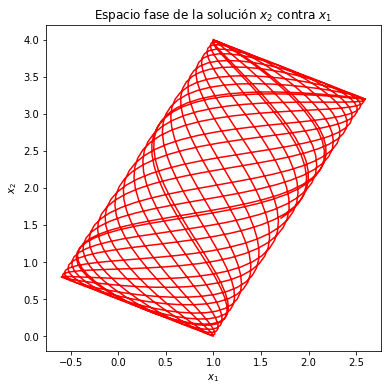

In [ ]:
#Definimos la funcion con la que calcularemos la derivada
def f(y, t, k1, k2, b1, b2):
  x1, x2, v1, v2 = y
  dxdt=[v1, v2, -(k1+k2)*x1+k2*x2-b1*v1+k1-k2, k2*x1-k2*x2-b2*v2+k2]
  return dxdt
k1=6
k2=4
b1 = b2 = 0
y0=[1,4,0,0]

#Calculamos los eigen valores de la matriz
E=np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,b2]])
eigenval, eigenvec = la.eig(E)

#Definimos las condiciones
#Definimos puntos de tiempo t
t=np.linspace(0,50,1000)
k1=6
k2=4
b1 = b2 = 0
y0=[1,4,0,0]
y=odeint(f,y0,t,args=(k1, k2, b1, b2))

#Graficamos las soluciones en función del tiempo en el espacio fase
plt.figure(figsize=(6,6))
plt.plot(y[0:,0],y[0:,1],color='r')
plt.title('Espacio fase de la solución $x_2$ contra $x_1$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

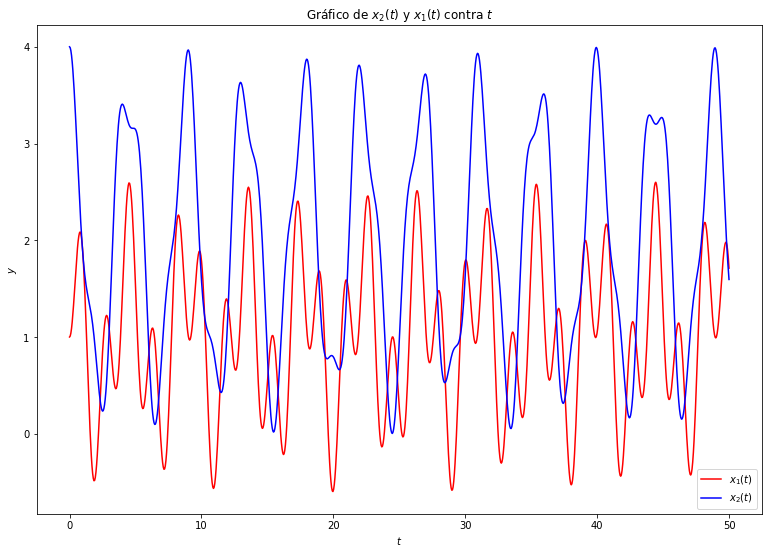

In [ ]:
#Ahora graficamos las soluciones del sistema en funcion del tiempo
plt.figure(figsize=(13,9))
plt.plot(t,y[0:,0],color='r',label='$x_1(t)$')
plt.plot(t,y[0:,1],color='b',label='$x_2(t)$')
plt.title('Gráfico de $x_2(t)$ y $x_1(t)$ contra $t$')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.show()

In [ ]:
#Definimos las condiciones considerando ahora la friccion (b=0.2)
def f(y, t, k1, k2, b1, b2):
  x1, x2, v1, v2 = y
  dxdt=[v1, v2, -(k1+k2)*x1+k2*x2-b1*v1+k1-k2, k2*x1-k2*x2-b2*v2+k2]
  return dxdt
k1=6
k2=4
b1 = 0.1
b2 = 0.2
y0=[1,4,0,0]

#Calculamos los eigen valores de la matriz
E=np.array([[0,0,1,0],[0,0,0,1],[-(k1+k2),k2,-b1,0],[k2,-k2,0,b2]])
eigenval, eigenvec = la.eig(E)

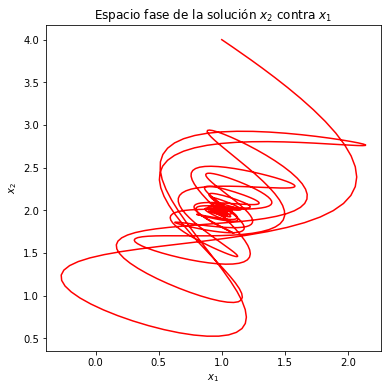

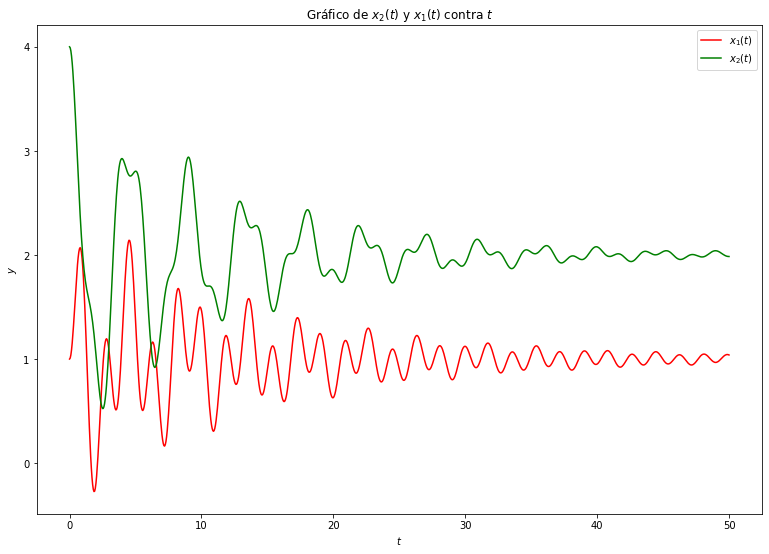

In [ ]:
#Definimos las condiciones
#Definimos puntos de tiempo t
t=np.linspace(0,50,1000)
k1=6
k2=4
b1 = 0.1
b2 = 0.2
y0=[1,4,0,0]
y=odeint(f,y0,t,args=(k1, k2, b1, b2))

#Graficamos las soluciones en función del tiempo en el espacio fase
plt.figure(figsize=(6,6))
plt.plot(y[0:,0],y[0:,1],color='r')
plt.title('Espacio fase de la solución $x_2$ contra $x_1$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

#Ahora graficamos las soluciones del sistema en funcion del tiempo
plt.figure(figsize=(13,9))
plt.plot(t,y[0:,0],color='r',label='$x_1(t)$')
plt.plot(t,y[0:,1],color='g',label='$x_2(t)$')
plt.title('Gráfico de $x_2(t)$ y $x_1(t)$ contra $t$')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.show()